Linear Regression -> MSE: 246.1218, R²: 0.9681
Polynomial Regression (Degree=3) -> MSE: 247.9792, R²: 0.9678


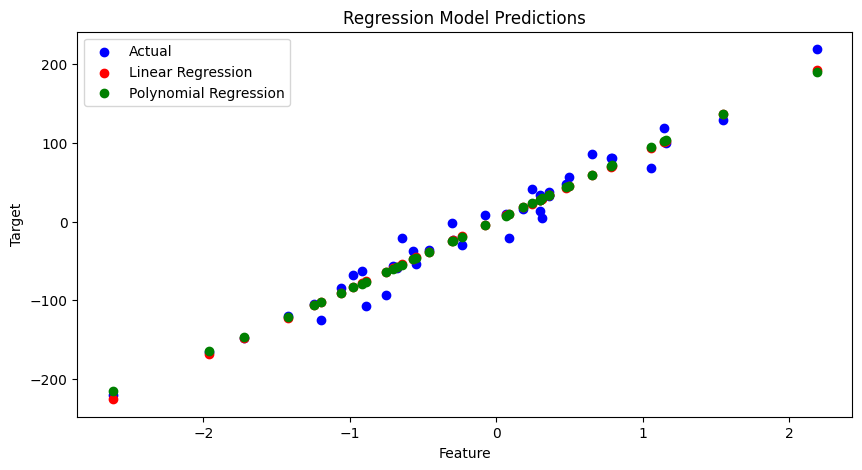

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_linear = lin_reg.predict(X_test_scaled)

# Polynomial Regression Model (Degree = 3 as an example)
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Model Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Results
print(f'Linear Regression -> MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}')
print(f'Polynomial Regression (Degree=3) -> MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}')

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Regression')
plt.legend()
plt.title('Regression Model Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()